<a href="https://colab.research.google.com/github/rajeevfromkrec/computer-vision/blob/master/Face_detection_with_MTCNN%20and%20CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
from cv2 import CascadeClassifier
from cv2 import imread
from cv2 import rectangle
print(cv2.__version__)

4.1.2


In [7]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg

--2020-07-11 16:57:31--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 151.139.105.14
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|151.139.105.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142525 (139K) [image/jpeg]
Saving to: ‘test1.jpg.2’

test1.jpg.2         100%[===================>] 139.18K  --.-KB/s    in 0.03s   

2020-07-11 16:57:32 (5.41 MB/s) - ‘test1.jpg.2’ saved [142525/142525]

--2020-07-11 16:57:37--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 151.139.105.14
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr2

OpenCV provides the CascadeClassifier class that can be used to create a cascade classifier for face detection. The constructor can take a filename as an argument that specifies the XML file for a pre-trained model.

OpenCV provides a number of pre-trained models as part of the installation. These are available on your system and are also available on the OpenCV GitHub project.

Download a pre-trained model for frontal face detection from the OpenCV GitHub project and place it in your current working directory with the filename ‘haarcascade_frontalface_default.xml‘.

In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-07-11 16:55:16--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-07-11 16:55:17 (7.28 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
classifier= CascadeClassifier('haarcascade_frontalface_default.xml')

In [26]:
pixels=imread('test1.jpg')

In [27]:
type(pixels)

numpy.ndarray

In [28]:
pixels.shape

(427, 640, 3)

In [29]:
bboxes=classifier.detectMultiScale(pixels)

[174  75 107 107]
[360 102 101 101]


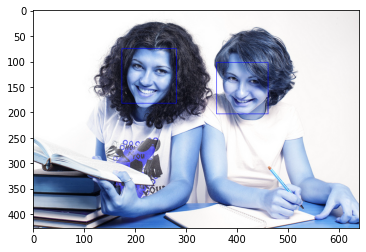

In [30]:
for box in bboxes:
  print(box)
  x,y,width,height= box
  x2,y2=x+width, y+height
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

plt.imshow(pixels)

In [15]:
import matplotlib.pyplot as plt

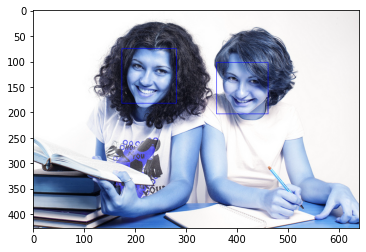

In [31]:
plt.imshow(pixels)

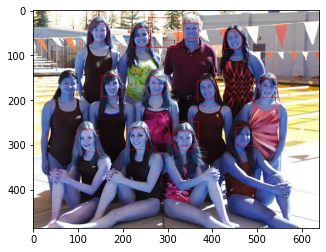

In [32]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
import matplotlib.pyplot as plt
%matplotlib inline
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (255,0,0), 1)
# show the image
plt.imshow(pixels)
# keep the window open until we press a key

In [34]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [35]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras, opencv-python
Required-by: 


In [36]:
import mtcnn

Using TensorFlow backend.


In [37]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [46]:
pixels=plt.imread('test2.jpg')

In [47]:
detector=MTCNN()

In [48]:
faces=detector.detect_faces(pixels)

In [49]:
for face in faces:
  x,y,width,height= face['box']
  x2, y2= x+width, y+height
  rectangle(pixels, (x,y),(x2,y2),(255,0,0),1)

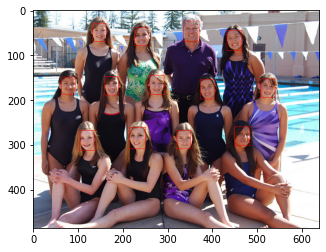

In [50]:
plt.imshow(pixels)

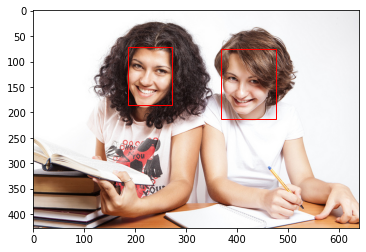

In [51]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

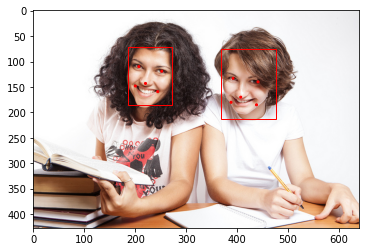

In [52]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [63]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

def extract_faces(filename,faces):

  pixels=pyplot.imread(filename)

  for i in  range(len(faces)):
    x,y,width, height= faces[i]['box']
    x2, y2= x+width, y+height

    pyplot.subplot(1,len(faces),i+1)
    pyplot.axis('off')

    pyplot.imshow(pixels[y:y2, x:x2])

  pyplot.show()


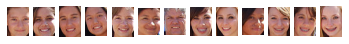

In [64]:
pixels= pyplot.imread('test2.jpg')

detector= MTCNN()

faces=detector.detect_faces(pixels)

extract_faces('test2.jpg',faces)
